I like to work with timeseries data, they are my favorites

In [1]:
import json
import gzip
import datetime
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tqdm import tqdm
from collections import Counter

In [2]:
# Loading the dataset
folder = "./data/"
df_timeseries = pd.read_csv(folder + "df_timeseries_en.tsv", sep="\t")

# Convert 'datetime' column to datetime object
df_timeseries['datetime'] = pd.to_datetime(df_timeseries['datetime'])

# Displaying the dataset
df_timeseries.head(2)

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03,202494.555556,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10,394085.666667,191591.111111,1046.000000,395.777778,6,1,1


In [3]:
# Loading the metadata mental health related dataset
df_metadata = pd.read_csv(folder + "metadata_mental_best.csv")

# Creating a new sub-dataset from the time series one with only the channel_id coming from the metadata mental health dataset :
# Extract unique channel IDs from the metadata mental health dataset
mental_health_channel_ids = df_metadata['channel_id'].unique()

# Filter the time series dataset based on channel IDs
df_timeseries_mental_health = df_timeseries[df_timeseries['channel'].isin(mental_health_channel_ids)].copy()
timeseries_mental_health_channel_ids = df_timeseries_mental_health['channel'].unique()

# Set the normal indeces (0,1,2...)
df_timeseries_mental_health.reset_index(drop=True, inplace=True) 

# Display the new dataset
df_timeseries_mental_health.head(5)

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCK-QfN_fautoBhHm2C4uECQ,Gaming,2016-08-29,7766234.00,18652.00,31357.250,0.000,3071,0,20
1,UCK-QfN_fautoBhHm2C4uECQ,Gaming,2016-09-05,7829982.00,63748.00,31581.000,223.750,3081,10,21
2,UCK-QfN_fautoBhHm2C4uECQ,Gaming,2016-09-12,7884526.00,54544.00,31798.000,217.000,3090,9,22
3,UCK-QfN_fautoBhHm2C4uECQ,Gaming,2016-09-19,7938265.00,53739.00,31986.125,188.125,3105,15,27
4,UCK-QfN_fautoBhHm2C4uECQ,Gaming,2016-09-26,7995220.75,56955.75,32167.500,181.375,3126,21,38


In [4]:
# Sorting of the dataset for having each videos of one channel in order
df_timeseries_mental_health['datetime'] = pd.to_datetime(df_timeseries_mental_health['datetime'])  # Convert to datetime format

# Sort the DataFrame by "channel" and "datetime"
df_timeseries_mental_health = df_timeseries_mental_health.sort_values(by=['channel', 'datetime'])

# If you want to reset the index after sorting
df_timeseries_mental_health = df_timeseries_mental_health.reset_index(drop=True)

# Display the new dataset
df_timeseries_mental_health.head(5)

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-01,62524.500,4113.500,1466.000,0.000,29,0,1
1,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-08,67600.250,5075.750,1508.625,42.625,30,1,2
2,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-15,69982.000,2381.750,1530.750,22.125,31,1,2
3,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-22,72663.125,2681.125,1558.625,27.875,32,1,2
4,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-29,75093.000,2429.875,1591.000,32.375,33,1,2


In [5]:
# Create a new column 'relative_delta_views' and set it to zero initially
df_timeseries_mental_health['relative_delta_views'] = 0.0

# Group the DataFrame by 'channel' and calculate the relative delta views
df_timeseries_mental_health['relative_delta_views'] = df_timeseries_mental_health.groupby('channel')['delta_views'].pct_change().fillna(0)

In [6]:
df_timeseries_mental_health['week'] = df_timeseries_mental_health['datetime'] - pd.to_timedelta(df_timeseries_mental_health['datetime'].dt.dayofweek, unit='d')

df_metadata['upload_date'] = pd.to_datetime(df_metadata['upload_date'])
df_metadata['week'] = df_metadata['upload_date'] - pd.to_timedelta(df_metadata['upload_date'].dt.dayofweek, unit='d')

df_metadata.rename(columns={'channel_id': 'channel'}, inplace=True)

In [13]:
#make the merging: do it such that no nan values are created 



df_timeseries_mental_health = df_timeseries_mental_health.merge(df_metadata, how = 'left', indicator=True, left_on= ['week', 'channel'],right_on= ['week', 'channel'])





,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity,...,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,upload_month,_merge
0,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-01,62524.500,4113.500,1466.000,0.000,29,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,left_only
1,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-08,67600.250,5075.750,1508.625,42.625,30,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,left_only
2,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-15,69982.000,2381.750,1530.750,22.125,31,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,left_only
3,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-22,72663.125,2681.125,1558.625,27.875,32,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,left_only
4,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-29,75093.000,2429.875,1591.000,32.375,33,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,left_only


In [8]:
#remove columns from merging
words_to_remove = ["channel", "week"]

# Using list comprehension
columns_to_remove = [' '.join([word for word in string.split() if word not in words_to_remove]) for string in df_metadata.columns]

df_timeseries_mental_health = df_timeseries_mental_health.drop(columns=columns_to_remove, errors='ignore')


In [9]:
df_timeseries_mental_health['_merge'] = df_timeseries_mental_health['_merge'].replace({'left_only': 0, 'both': 1, 'right_only': 0})
df_timeseries_mental_health.rename(columns={'_merge': 'mh_video'}, inplace=True)

Try to see a few channels


In [10]:
df_timeseries_mental_health[df_timeseries_mental_health['channel']== 'UC--24Q3_ZQeFmgJE-Um5QZQ'][df_timeseries_mental_health['mh_video']==1]

/tmp/ipykernel_22764/128994753.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_timeseries_mental_health[df_timeseries_mental_health['channel']== 'UC--24Q3_ZQeFmgJE-Um5QZQ'][df_timeseries_mental_health['mh_video']==1]


,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity,relative_delta_views,week,mh_video
56,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2017-08-28,224251.0,2901.75,2618.0,21.0,85,1,2,0.074424,2017-08-28,1


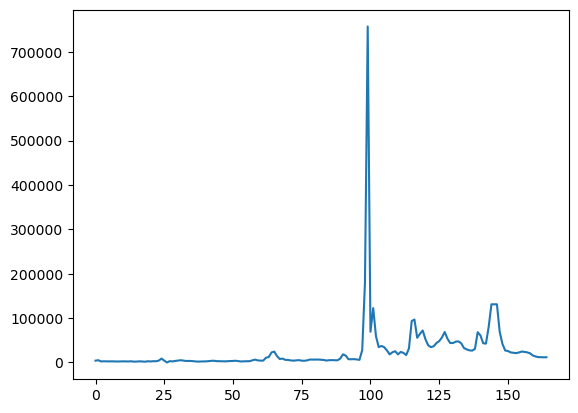

In [11]:
views_channel_try = df_timeseries_mental_health[df_timeseries_mental_health['channel']== 'UC--24Q3_ZQeFmgJE-Um5QZQ']['delta_views'].to_numpy()
indeces = df_timeseries_mental_health[df_timeseries_mental_health['channel']== 'UC--24Q3_ZQeFmgJE-Um5QZQ'].index
plt.plot(indeces, views_channel_try)

In [12]:
df_timeseries_mental_health[df_timeseries_mental_health['channel']== 'UC--24Q3_ZQeFmgJE-Um5QZQ']

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity,relative_delta_views,week,mh_video
0,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-01,6.252450e+04,4113.500000,1466.000000,0.000000,29,0,1,0.000000,2016-08-01,0
1,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-08,6.760025e+04,5075.750000,1508.625000,42.625000,30,1,2,0.233925,2016-08-08,0
2,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-15,6.998200e+04,2381.750000,1530.750000,22.125000,31,1,2,-0.530759,2016-08-15,0
3,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-22,7.266312e+04,2681.125000,1558.625000,27.875000,32,1,2,0.125695,2016-08-22,0
4,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2016-08-29,7.509300e+04,2429.875000,1591.000000,32.375000,33,1,2,-0.093711,2016-08-29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2019-08-26,4.309336e+06,13714.632353,17302.705882,5.455882,184,1,2,-0.139272,2019-08-26,0
161,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2019-09-02,4.321386e+06,12050.294118,17310.941176,8.235294,185,1,2,-0.121355,2019-09-02,0
162,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2019-09-09,4.333376e+06,11990.252101,17316.714286,5.773109,186,1,2,-0.004983,2019-09-09,0
163,UC--24Q3_ZQeFmgJE-Um5QZQ,Travel & Events,2019-09-16,4.345006e+06,11630.000000,17307.714286,0.000000,187,1,2,-0.030045,2019-09-16,0
